<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/magdiplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import imutils

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="KlfuZxqMCfq22KG6TKdR")
project = rf.workspace("research-xvh79").project("window-detection-vnpow")
dataset = project.version(1).download("coco")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Window-detection-1 in coco:: 100%|██████████| 4848/4848 [00:01<00:00, 3899.73it/s]


In [14]:
import shutil

for file1 in os.listdir('/content/Window-detection-1/train'):
  if(file1.endswith('.json')):
    save_path = '/content/drive/MyDrive/diplom/'
    shutil.move(os.path.join('/content/Window-detection-1/train',file1), save_path)

In [18]:
def getImageNameByImageId (images, id):
  for el in images:
    if(el['id']==id):
      return el['file_name']

683
27_jpg.rf.cde36ae233f6fb93b9a972fad2a3009d.jpg


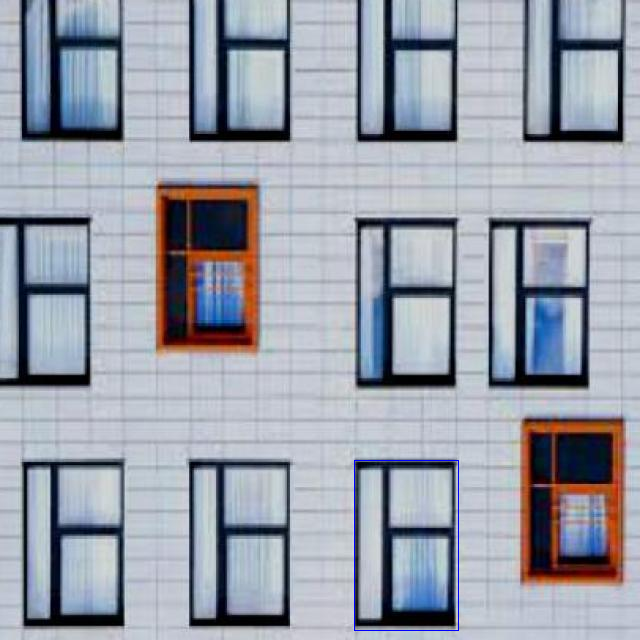

(640, 640, 3)


In [37]:
import json
f = open('/content/drive/MyDrive/diplom/_annotations.coco.json')
data = json.load(f)
annotation = data['annotations'][1890]
image_id = annotation['image_id']
bbox = annotation['bbox']
x1=bbox[0]
y1=bbox[1]
w=bbox[2]
h=bbox[3]
print(image_id)

filename = getImageNameByImageId(data['images'],image_id)
img_path = "/content/Window-detection-1/train/"
print(filename)
img = cv2.imread(img_path+filename)
image = cv2.rectangle(img, (x1,y1), (x1+w,y1+h), (255, 0, 0), 1)
cv2_imshow(image)
print(image.shape)




In [2]:
def resizeImage(width, height, image):
  down_points = (width, height)
  return cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)

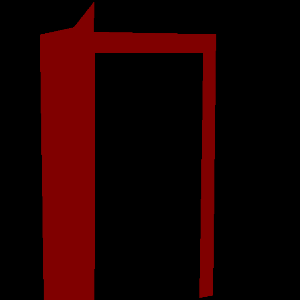

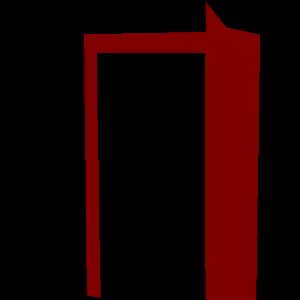

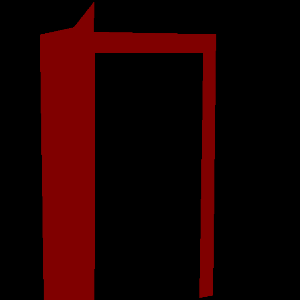

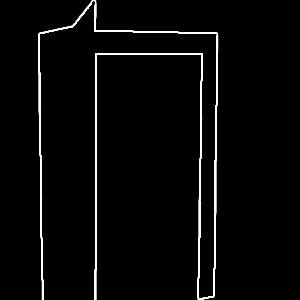

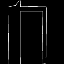

True

In [10]:
img_path = 'https://drive.google.com/drive/folders/1EX_p0ncVGXKN3piWRa7h463ii8IAfFMy'
path = '/content/drive/MyDrive/diplom/test/'
img = cv2.imread(img_path)
img300 = resizeImage(300,300,img)
cv2_imshow(img300)
image = cv2.flip(img300,1)
cv2_imshow(image)
# imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=10, sigma_r=0.9)
imgEdge= img300
imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
cv2_imshow(imgEdge)
imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
cv2_imshow(imgLap)
# img64 = resizeImage(64,64,imgLap)
# cv2_imshow(img64)
# cv2_imshow(cv2.flip(img64,1))


# img64 = resizeImage(64,64,imgLap)
# cv2_imshow(img64)


resized = imutils.resize(imgLap, width=64,height=64)
cv2_imshow(resized)
cv2.imwrite(os.path.join(path , 'doorFinal.png'), resized)

In [ ]:
all_img_paths = glob.glob("/content/drive/MyDrive/diplom/photos/angles/*")
path = '/content/drive/MyDrive/diplom/readyImg/angle/'
i=0
print(len(all_img_paths))
for img_path in all_img_paths:
  img = cv2.imread(img_path)
  img300 = resizeImage(300,300,img)
  imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=10, sigma_r=0.9)
  imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
  imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
  # img64 = imutils.resize(imgLap, width=64,height=64)
  # cv2_imshow(img64)
  cv2.imwrite(os.path.join(path , 'angle'+str(i)+'.jpg'), imgLap)
  i+=1
  flip = cv2.flip(imgLap,1)
  cv2.imwrite(os.path.join(path , 'angle'+str(i)+'.jpg'), flip)
  i+=1

# img_path = '/content/drive/MyDrive/diplom/photos/doors/IMG_1840_126.jpg'

# img = cv2.imread(img_path)
# img300 = resizeImage(300,300,img)
# cv2_imshow(img300)
# image = cv2.flip(img300,1)
# cv2_imshow(image)
# imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=10, sigma_r=0.9)
# imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
# cv2_imshow(imgEdge)
# imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
# cv2_imshow(imgLap)
# img64 = resizeImage(64,64,imgLap)
# cv2_imshow(img64)
# cv2_imshow(cv2.flip(img64,1))


# # img64 = resizeImage(64,64,imgLap)
# # cv2_imshow(img64)


# resized = imutils.resize(imgLap, width=64,height=64)
# cv2_imshow(resized)

333


Doors count
2378
angle count
666


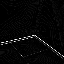

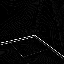

In [ ]:
DATADIR = "/content/drive/MyDrive/diplom/readyImg/"

LABELS = ["angle", "door", "stair"]
print("Doors count")
print(len(glob.glob("/content/drive/MyDrive/diplom/readyImg/door/*")))

print("angle count")
print(len(glob.glob("/content/drive/MyDrive/diplom/readyImg/angle/*")))

X_TRAIN = []
Y_TRAIN = []

IMG_SIZE = 64
for category in LABELS:
    path = os.path.join(DATADIR, category)
    class_num = LABELS.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            X_TRAIN.append(new_array)
            Y_TRAIN.append(class_num)
        except Exception as e:
            pass
cv2_imshow(X_TRAIN[10])
X_TRAIN = np.array(X_TRAIN).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y_TRAIN = np.array(Y_TRAIN)
cv2_imshow(X_TRAIN[10])
X_TRAIN = X_TRAIN/255

In [ ]:
print(len(X_TRAIN))
print(len(Y_TRAIN))
#print(X_TRAIN)

4012
4012


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.add(layers.Activation("softmax"))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 flatten_8 (Flatten)         (None, 9216)            

In [ ]:
model = models.Sequential()
# model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(64, 64,3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(64, 64,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(32, 32,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(64, (5, 5), activation='relu',padding='same' ,input_shape=(16, 16,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 activation_41 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 activation_42 (Activation)  (None, 16, 16, 32)      

In [ ]:
history = model.fit(X_TRAIN,Y_TRAIN, epochs=3, validation_split=0.4)

Epoch 1/3
76/76 [==============================] - 72s 432ms/step - loss: 0.1139 - accuracy: 0.9585 - val_loss: 46.9471 - val_accuracy: 0.2866
Epoch 2/3
76/76 [==============================] - 32s 424ms/step - loss: 1.2969e-04 - accuracy: 1.0000 - val_loss: 48.9913 - val_accuracy: 0.2953
Epoch 3/3
76/76 [==============================] - 31s 408ms/step - loss: 3.4845e-05 - accuracy: 1.0000 - val_loss: 50.2639 - val_accuracy: 0.2984


1/1 [==============================] - 0s 102ms/step
[[1.2135679e-01 8.7864321e-01]
 [1.0000000e+00 6.7837433e-09]
 [4.8540006e-04 9.9951458e-01]]
2


IndexError: ignored

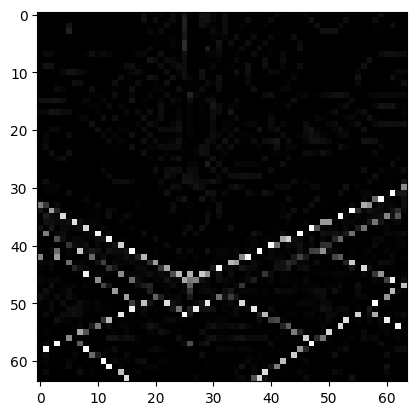

In [ ]:
import matplotlib.pyplot as plt
TESTDIR = "/content/drive/MyDrive/diplom/test/angle1.jpg"
# for img in os.listdir(TESTDIR):
#     try:
#         img_array = cv2.imread(os.path.join(TESTDIR, img))
#         new_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#         new_shape = new_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#         predictions = model.predict(new_shape)
#         # plt.imshow(new_img)
#         # print(predictions)
#         print(LABELS[np.argmax(predictions)])
#     except Exception as e:
#         pass
img_array = cv2.imread(TESTDIR)
new_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_shape = new_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(new_shape)
plt.imshow(new_img)
print(predictions)
print(np.argmax(predictions))
print(LABELS[np.argmax(predictions)])